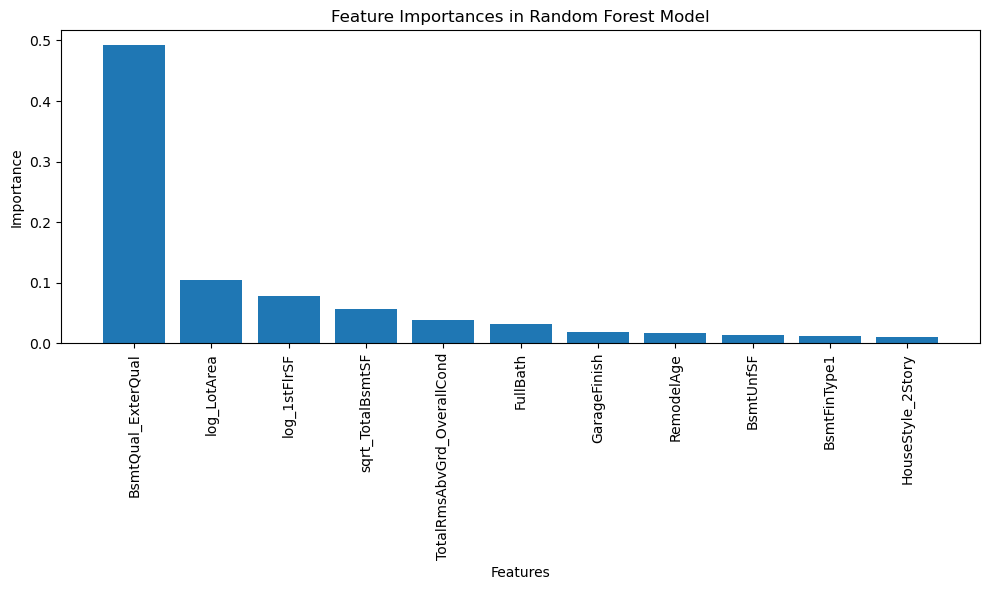

選択された重要な特徴量:
['BsmtQual_ExterQual', 'log_LotArea', 'log_1stFlrSF', 'sqrt_TotalBsmtSF', 'TotalRmsAbvGrd_OverallCond', 'FullBath', 'GarageFinish', 'RemodelAge', 'BsmtUnfSF', 'BsmtFinType1', 'HouseStyle_2Story']
重要度が0.01以上の特徴量のデータを/Users/hayakawakazue/Downloads/house_price/train/important_features.csvに保存しました。
モデルを/Users/hayakawakazue/Downloads/house_price/model/test_random_forest.joblibに保存しました。


In [2]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# トレーニングデータの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/scaled_data.csv'
data = pd.read_csv(data_path)

# 目的変数'SalePrice'とその他の特徴量を分ける
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルの初期化とトレーニング
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 特徴量の重要性を取得
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# 重要度が0.01以上の特徴量のみフィルタリング
important_features = feature_importances[feature_importances['importance'] > 0.01].index.tolist()

# 特徴量の重要性をプロット
plt.figure(figsize=(10, 6))
plt.bar(feature_importances[feature_importances['importance'] > 0.01].index,
        feature_importances[feature_importances['importance'] > 0.01]['importance'])
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 重要な特徴量と目的変数を含むデータを選択
important_data = data[['SalePrice'] + important_features]

# ファイルに保存
save_path = '/Users/hayakawakazue/Downloads/house_price/train/important_features.csv'
important_data.to_csv(save_path, index=False)

# モデルの保存
model_save_path = '/Users/hayakawakazue/Downloads/house_price/model/test_random_forest.joblib'
joblib.dump(model, model_save_path)

# 重要な特徴量のリストをプリント
print("選択された重要な特徴量:")
print(important_features)
print(f"重要度が0.01以上の特徴量のデータを{save_path}に保存しました。")
print(f"モデルを{model_save_path}に保存しました。")

